In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('/content/data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0         4.0
1  2018-01-04      1  address_0    product_1         4.0
2  2018-01-04      1  address_0    product_2         5.0
3  2018-01-04      1  address_0    product_3        10.0
4  2018-01-04      1  address_0    product_4         2.0


Проверяем формат столбцов

In [22]:
df.dtypes

,0
Дата,object
Склад,int64
Контрагент,object
Номенклатура,object
Количество,float64


Сразу переведем столбец "Дата" в правильный формат

In [23]:
df['Дата']=pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [24]:
grouped_df = df.groupby('Дата')['Количество'].count()

Вывести несколько первых строк сгруппированных данных

In [25]:
grouped_df.head(3)

,Количество
Дата,
2018-01-04,1840
2018-01-05,1301
2018-01-06,1306


Нарисуйте график продаж у `grouped_df`

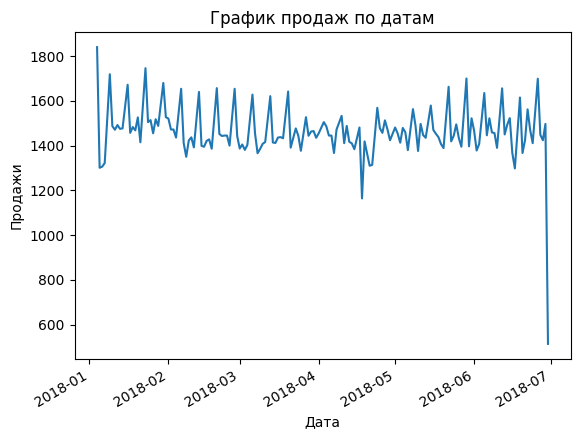

In [26]:
import matplotlib.pyplot as plt

plt.figure()
grouped_df.plot()
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.title('График продаж по датам')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике показаны продажи по датам.

По горизонтальной оси находятся даты, а по вертикальной оси-количество продаж.

Можно увидеть, что продажи меняются со временем. В некоторые дни продаж больше, в другие-меньше. Это значит, что продажи не одинаковые каждый день.

На графике есть дни с высокими значениями, когда продажи были больше обычного, и дни с низкими значениями, когда продаж было меньше. Такие изменения могут быть связаны с разными причинами, например выходными днями, акциями или изменением спроса.

В целом график помогает понять, как продажи меняются со временем и в какие дни они были выше или ниже.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [27]:
df[df['Количество'] == df['Количество'].max()]

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200.0


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [28]:
df_3 = df[df['Склад'] == 3]

In [29]:
df_s = df_3[df_3['Дата'].dt.month.isin([6, 7, 8])]

In [30]:
df_wed = df_s[df_s['Дата'].dt.weekday == 2]

In [31]:
sales_by_product = (df_wed.groupby('Номенклатура')['Количество'].sum())

In [32]:
sales_by_product.sort_values(ascending=False).head(1)

,Количество
Номенклатура,
product_1,616.0


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [33]:
df_2=pd.read_excel('/content/35188.04.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls', header=5)
df_2

,#,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
1,31.08.2018 23:00,8.2,736.6,768.3,0.2,78,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12,NaN,NaN,NaN,NaN
2,31.08.2018 20:00,9.6,736.4,767.9,1.2,88,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12,NaN,NaN,NaN,NaN
3,31.08.2018 17:00,11.3,735.2,766.4,0.4,83,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10,8.5,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 14:00,12.3,734.8,765.9,0.9,80,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4,8.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,04.01.2018 14:00,-9.6,744.8,779.2,0.1,36,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,...,NaN,NaN,10,-21.9,NaN,NaN,NaN,NaN,NaN,NaN
1915,04.01.2018 11:00,-12.3,744.7,779.3,0.7,49,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,1,-20.8,NaN,NaN,NaN,NaN,NaN,NaN
1916,04.01.2018 08:00,-12.6,744,778.7,0.4,41,"Ветер, дующий с северо-востока",1,NaN,NaN,...,NaN,NaN,10,-23.1,NaN,NaN,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,16
1917,04.01.2018 05:00,-12.3,743.6,778.3,0.1,40,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,...,NaN,NaN,NaN,-23.1,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_2.columns = df_2.iloc[0]
df_2 = df_2.drop(index=0).reset_index(drop=True)
df_2

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1,83,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10,10.3,3,12,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,04.01.2018 14:00,-9.6,744.8,779.2,0.1,36,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,...,NaN,NaN,10,-21.9,NaN,NaN,NaN,NaN,NaN,NaN
1914,04.01.2018 11:00,-12.3,744.7,779.3,0.7,49,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,1,-20.8,NaN,NaN,NaN,NaN,NaN,NaN
1915,04.01.2018 08:00,-12.6,744,778.7,0.4,41,"Ветер, дующий с северо-востока",1,NaN,NaN,...,NaN,NaN,10,-23.1,NaN,NaN,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,16
1916,04.01.2018 05:00,-12.3,743.6,778.3,0.1,40,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,...,NaN,NaN,NaN,-23.1,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
weather = df_2[['Местное время в Астане', 'T']]

In [36]:
weather['Дата'] = pd.to_datetime(weather['Местное время в Астане'], errors='coerce')

/tmp/ipython-input-3303574929.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather['Дата'] = pd.to_datetime(weather['Местное время в Астане'], errors='coerce')
/tmp/ipython-input-3303574929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['Дата'] = pd.to_datetime(weather['Местное время в Астане'], errors='coerce')


In [37]:
weather['Дата'] = pd.to_datetime(weather['Дата']).dt.date

weather_daily = (weather.groupby('Дата', as_index=False)['T'].mean())
weather_daily['Дата'] = pd.to_datetime(weather_daily['Дата'])


/tmp/ipython-input-3435719204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['Дата'] = pd.to_datetime(weather['Дата']).dt.date


In [38]:
merged = pd.merge(
    grouped_df,
    weather_daily,
    on='Дата',
    how='inner')

In [39]:
merged.head()

,Дата,Количество,T
0,2018-01-04,1840,-14.075
1,2018-01-05,1301,-16.8625
2,2018-01-06,1306,-13.3
3,2018-01-07,1322,-12.75
4,2018-01-09,1719,-6.25


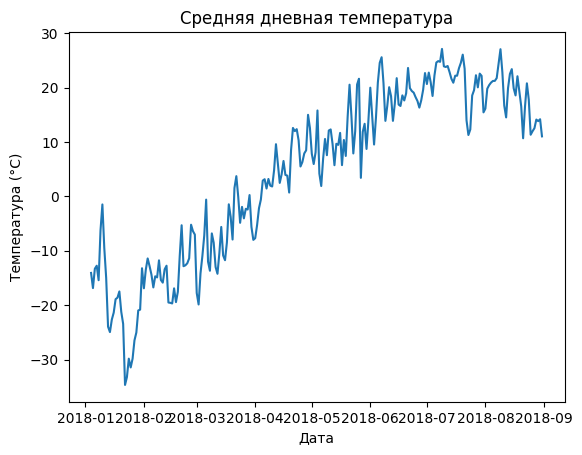

In [40]:
plt.figure()
plt.plot(weather_daily['Дата'], weather_daily['T'])
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Средняя дневная температура')
plt.show()

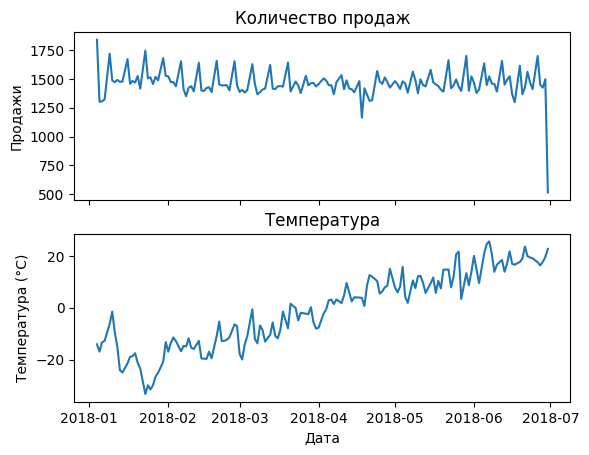

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(merged['Дата'], merged['Количество'])
ax1.set_ylabel('Продажи')
ax1.set_title('Количество продаж')

ax2.plot(merged['Дата'], merged['T'])
ax2.set_ylabel('Температура (°C)')
ax2.set_title('Температура')

plt.xlabel('Дата')
plt.show()
